In [19]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


(28, 28)

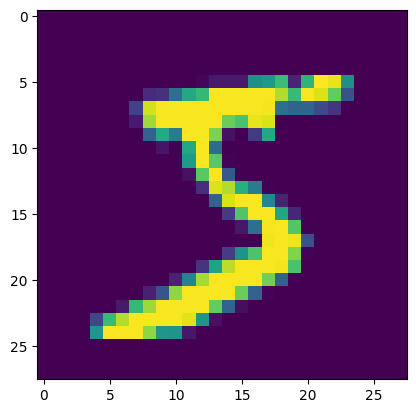

In [22]:
plt.imshow(X_train[0])

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train[0]

5

**Preprocesing: scaling Images**

In [7]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [8]:
X_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

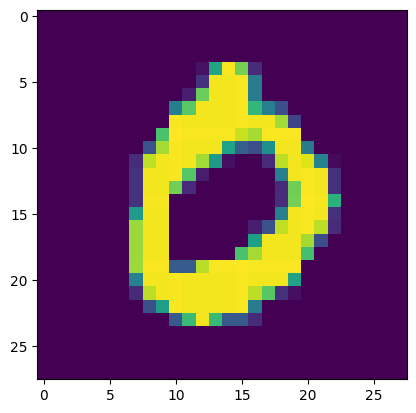

In [23]:
plt.imshow(X_test_scaled[3])

In [10]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [11]:
#Reshaping X_train and X_test
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_train_scaled.shape

(60000, 28, 28, 1)

In [12]:
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)
X_test_scaled.shape

(10000, 28, 28, 1)

In [13]:
cnn_mnist = keras.Sequential([
    
    keras.layers.Conv2D(filters=30, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2,2)),
 
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
cnn_mnist.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
cnn_mnist.fit(X_train_scaled,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1572 - accuracy: 0.9538
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0359 - accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0151 - accuracy: 0.9951


In [14]:
cnn_mnist.evaluate(X_test_scaled,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0545 - accuracy: 0.9831


[0.05454419553279877, 0.9830999970436096]

In [15]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [17]:
y_pred = cnn_mnist.predict(X_test_scaled)
y_pred = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 3s 8ms/step


In [18]:
y_pred[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [20]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.97      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Text(50.722222222222214, 0.5, 'True')

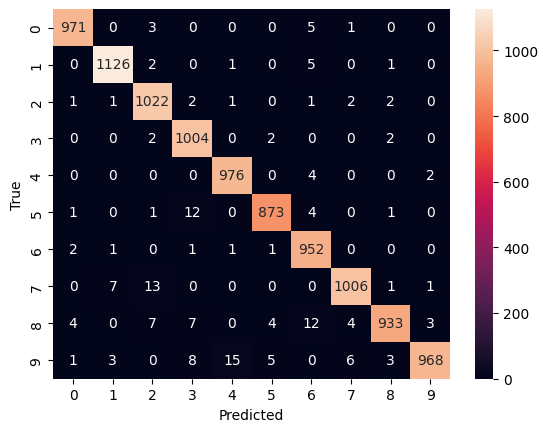

In [21]:
cm = confusion_matrix(y_test,y_pred)
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')